In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [43]:
all_year_ave = pd.DataFrame()

In [6]:
def calculate_day_of_year(row):
    date = row['Date']
    year = row['Year']
    
    # Check if it's a leap year
    is_leap_year = year % 4 == 0
    
    # Calculate the day of the year normally
    day_of_year = date.dayofyear
    
    # If it's after February 28 in a leap year, subtract 1 to ignore Feb 29
    if is_leap_year and date.month > 2:
        day_of_year -= 1
    
    return int(day_of_year)

In [55]:
originalCSV = "sanfrancisco.csv"
modifiedPath = "sf_post1980.csv"


In [56]:
key ='Mean.TemperatureF'
year = 1980
df = pd.read_csv(originalCSV, usecols=['Date', key,'season','Mean.Humidity'])
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df

Date  Mean.TemperatureF  Mean.Humidity  season  Year
0     1948-01-01               50.0           87.0  Winter  1948
1     1948-01-02               55.0           91.0  Winter  1948
2     1948-01-03               54.0           94.0  Winter  1948
3     1948-01-04               57.0           91.0  Winter  1948
4     1948-01-05               55.0           91.0  Winter  1948
...          ...                ...            ...     ...   ...
24738 2015-12-27               41.0           71.0  Winter  2015
24739 2015-12-28               45.0           77.0  Winter  2015
24740 2015-12-29               45.0           67.0  Winter  2015
24741 2015-12-30               45.0           80.0  Winter  2015
24742 2015-12-31               45.0           66.0  Winter  2015

[24743 rows x 5 columns]

In [57]:
filtered_df = df[df['Date'].dt.year >= year]
filtered_df = filtered_df[~((filtered_df['Date'].dt.month == 2) & (filtered_df['Date'].dt.day == 29))]
filtered_df = filtered_df.reset_index(drop=True)

for index, row in filtered_df.iterrows():
    filtered_df.loc[index, 'Day'] = calculate_day_of_year(row)
    if (calculate_day_of_year(row)> 365):
        print(row)

filtered_df['Day'] = filtered_df['Day'].astype(int)
filtered_df

Date  Mean.TemperatureF  Mean.Humidity  season  Year  Day
0     1980-01-01               50.0           93.0  Winter  1980    1
1     1980-01-02               44.0           98.0  Winter  1980    2
2     1980-01-03               50.0           84.0  Winter  1980    3
3     1980-01-04               50.0           83.0  Winter  1980    4
4     1980-01-05               50.0           79.0  Winter  1980    5
...          ...                ...            ...     ...   ...  ...
13042 2015-12-27               41.0           71.0  Winter  2015  361
13043 2015-12-28               45.0           77.0  Winter  2015  362
13044 2015-12-29               45.0           67.0  Winter  2015  363
13045 2015-12-30               45.0           80.0  Winter  2015  364
13046 2015-12-31               45.0           66.0  Winter  2015  365

[13047 rows x 6 columns]

In [58]:
df_2001 = df[df['Date'].dt.year == 2001].copy()
df_1999 = df[df['Date'].dt.year == 1999].copy()

In [59]:
date_range = pd.date_range(start="2000-01-01", end="2000-12-31", freq='D')
year2000 = filtered_df[filtered_df['Date'].dt.year == 2000]
missing_dates = date_range.difference(year2000['Date'])
missing_df = pd.DataFrame()


for missing_date in missing_dates:
    if missing_date.month == 2 and missing_date.day == 29:
        continue
    date_in_1999 = missing_date.replace(year=1999)
    date_in_2001 = missing_date.replace(year=2001)
    
    # Get the rows for 1999 and 2001
    row_1999 = df_1999[df_1999['Date'] == date_in_1999]
    row_2001 = df_2001[df_2001['Date'] == date_in_2001]
    
    # If both years have data for that date
    if not row_1999.empty and not row_2001.empty:
        # Calculate the average for each column (e.g., Mean.TemperatureF, Mean.Humidity)
        avg_temp = (row_1999['Mean.TemperatureF'].values[0] + row_2001['Mean.TemperatureF'].values[0]) / 2
        avg_humidity = (row_1999['Mean.Humidity'].values[0] + row_2001['Mean.Humidity'].values[0]) / 2
        
        day_of_year = missing_date.dayofyear
        if missing_date.month > 2:
            day_of_year -= 1

        # Add the missing row to df_2000
        missing_row = pd.DataFrame({
            'Date': [missing_date],
            'Mean.TemperatureF': [avg_temp],
            'Mean.Humidity': [avg_humidity],
            'season': [row_1999['season'].values[0]],  # Assuming season is the same
            'Year': [2000],
            'Day': [day_of_year]
        })
        
        missing_df = pd.concat([missing_df, missing_row], ignore_index=True)

missing_df

Date  Mean.TemperatureF  Mean.Humidity  season  Year  Day
0  2000-02-23               50.0           84.0  Winter  2000   54
1  2000-02-24               50.0           88.5  Winter  2000   55
2  2000-02-25               51.0           79.5  Winter  2000   56
3  2000-02-26               49.5           80.5  Winter  2000   57
4  2000-02-27               53.5           69.0  Winter  2000   58
..        ...                ...            ...     ...   ...  ...
88 2000-08-24               62.0           84.0  Summer  2000  236
89 2000-08-25               64.0           77.0  Summer  2000  237
90 2000-08-28               63.0           79.5  Summer  2000  240
91 2000-08-29               62.5           81.5  Summer  2000  241
92 2000-08-30               63.0           74.5  Summer  2000  242

[93 rows x 6 columns]

In [60]:

df_2000_complete = pd.concat([filtered_df, missing_df], ignore_index=True)
df_2000_complete = df_2000_complete.sort_values('Date').reset_index(drop=True)
df_2000_complete

Date  Mean.TemperatureF  Mean.Humidity  season  Year  Day
0     1980-01-01               50.0           93.0  Winter  1980    1
1     1980-01-02               44.0           98.0  Winter  1980    2
2     1980-01-03               50.0           84.0  Winter  1980    3
3     1980-01-04               50.0           83.0  Winter  1980    4
4     1980-01-05               50.0           79.0  Winter  1980    5
...          ...                ...            ...     ...   ...  ...
13135 2015-12-27               41.0           71.0  Winter  2015  361
13136 2015-12-28               45.0           77.0  Winter  2015  362
13137 2015-12-29               45.0           67.0  Winter  2015  363
13138 2015-12-30               45.0           80.0  Winter  2015  364
13139 2015-12-31               45.0           66.0  Winter  2015  365

[13140 rows x 6 columns]

In [61]:
for index, row in df_2000_complete.iterrows():
    if (pd.isna(row['Mean.TemperatureF']) or pd.isnull(row['Mean.TemperatureF'])):
        date_in_1999 = row['Date'].replace(year=1999)
        date_in_2001 = row['Date'].replace(year=2001)
        
        # Get the rows for 1999 and 2001
        row_1999 = df_1999[df_1999['Date'] == date_in_1999]
        row_2001 = df_2001[df_2001['Date'] == date_in_2001]
        df_2000_complete.at[index, 'Mean.TemperatureF'] = (
                row_1999['Mean.TemperatureF'].values[0] + row_2001['Mean.TemperatureF'].values[0]
            ) / 2
    if (pd.isna(row['Mean.Humidity']) or pd.isnull(row['Mean.Humidity'])):
        date_in_1999 = row['Date'].replace(year=1999)
        date_in_2001 = row['Date'].replace(year=2001)
        
        # Get the rows for 1999 and 2001
        row_1999 = df_1999[df_1999['Date'] == date_in_1999]
        row_2001 = df_2001[df_2001['Date'] == date_in_2001]
        df_2000_complete.at[index, 'Mean.Humidity'] = (
                row_1999['Mean.Humidity'].values[0] + row_2001['Mean.Humidity'].values[0]
            ) / 2

In [39]:
df_2000_complete

Date  Mean.TemperatureF  Mean.Humidity  season  Year  Day
0     1980-01-01               62.0           73.0  Winter  1980    1
1     1980-01-02               56.0           67.0  Winter  1980    2
2     1980-01-03               62.0           61.0  Winter  1980    3
3     1980-01-04               70.0           83.0  Winter  1980    4
4     1980-01-05               60.0           68.0  Winter  1980    5
...          ...                ...            ...     ...   ...  ...
13135 2015-12-27               80.0           75.0  Winter  2015  361
13136 2015-12-28               80.0           78.0  Winter  2015  362
13137 2015-12-29               80.0           77.0  Winter  2015  363
13138 2015-12-30               81.0           81.0  Winter  2015  364
13139 2015-12-31               80.0           79.0  Winter  2015  365

[13140 rows x 6 columns]

In [16]:
df_2000_complete.to_csv(modifiedPath, index=False)

In [62]:
df_2000_complete['Year'] = df_2000_complete['Date'].dt.year
df_2000_complete['Month'] = df_2000_complete['Date'].dt.month

monthly_stats = df_2000_complete.groupby(['Year', 'Month']).agg(
    Max_Temperature=('Mean.TemperatureF', 'max'),
    Min_Temperature=('Mean.TemperatureF', 'min'),
    Mean_Temperature=('Mean.TemperatureF', 'mean'),
    Max_Humidity=('Mean.Humidity', 'max'),
    Min_Humidity=('Mean.Humidity', 'min'),
    Mean_Humidity=('Mean.Humidity', 'mean')
).reset_index()

monthly_stats

Year  Month  Max_Temperature  Min_Temperature  Mean_Temperature  \
0    1980      1             64.0             44.0         50.258065   
1    1980      2             60.0             48.0         54.392857   
2    1980      3             57.0             48.0         52.709677   
3    1980      4             64.0             50.0         55.366667   
4    1980      5             60.0             51.0         55.838710   
..    ...    ...              ...              ...               ...   
427  2015      8             79.0             65.0         68.258065   
428  2015      9             77.0             62.0         67.333333   
429  2015     10             75.0             62.0         65.741935   
430  2015     11             64.0             45.0         54.600000   
431  2015     12             60.0             41.0         50.709677   

     Max_Humidity  Min_Humidity  Mean_Humidity  
0            98.0          53.0      77.225806  
1            86.0          39.0      75.107143  
2            83.0          52.0      68.387097  
3            81.0          41.0      70.700000  
4            84.0          60.0      72.193548  
..            ...           ...            ...  
427          78.0          56.0      69.774194  
428          80.0          41.0      64.400000  
429          83.0          54.0      69.967742  
430          80.0          46.0      67.066667  
431          90.0          53.0      73.483871  

[432 rows x 8 columns]

In [64]:
all_years_stats = monthly_stats.groupby('Month').agg({
    'Max_Temperature': 'max',   # Max temperature across all years
    'Min_Temperature': 'min',   # Min temperature across all years
    'Mean_Temperature': 'mean', # Mean temperature across all years
    'Max_Humidity': 'max',      # Max humidity across all years
    'Min_Humidity': 'min',      # Min humidity across all years
    'Mean_Humidity': 'mean'     # Mean humidity across all years
}).reset_index()

# Rename the columns for clarity
all_years_stats.columns = [
    'Month',
    'Max_Temperature_All_Years', 
    'Min_Temperature_All_Years', 
    'Mean_Temperature_All_Years', 
    'Max_Humidity_All_Years', 
    'Min_Humidity_All_Years', 
    'Mean_Humidity_All_Years'
]

# Display the result


all_years_stats['city'] =  'SF'
all_years_stats

Month  Max_Temperature_All_Years  Min_Temperature_All_Years  \
0       1                       64.0                       40.0   
1       2                       64.0                       38.0   
2       3                       70.0                       44.0   
3       4                       76.0                       46.0   
4       5                       80.0                       51.0   
5       6                       85.0                       54.0   
6       7                       82.0                       54.0   
7       8                       82.0                       54.0   
8       9                       82.0                       57.0   
9      10                       81.0                       52.0   
10     11                       68.0                       44.0   
11     12                       63.0                       32.0   

    Mean_Temperature_All_Years  Max_Humidity_All_Years  \
0                    50.350358                    99.0   
1                    52.851687                   100.0   
2                    54.766577                    98.0   
3                    56.631944                    96.0   
4                    59.167563                    92.0   
5                    61.833796                    89.0   
6                    63.306452                    93.0   
7                    64.012993                    93.0   
8                    64.428704                    94.0   
9                    61.968638                    94.0   
10                   55.765741                    98.0   
11                   50.649642                   100.0   

    Min_Humidity_All_Years  Mean_Humidity_All_Years city  
0                     33.0                79.065412   SF  
1                     36.0                76.980655   SF  
2                     33.0                74.558692   SF  
3                     37.0                71.169444   SF  
4                     40.0                70.972670   SF  
5                     35.0                70.727778   SF  
6                     35.0                73.503584   SF  
7                     43.0                74.343190   SF  
8                     31.0                72.602778   SF  
9                     32.0                71.313620   SF  
10                    28.0                74.650926   SF  
11                    36.0                77.438172   SF

In [65]:

all_year_ave = pd.concat([all_year_ave, all_years_stats], ignore_index=True)
all_year_ave

Month  Max_Temperature_All_Years  Min_Temperature_All_Years  \
0       1                       80.0                       41.0   
1       2                       82.0                       47.0   
2       3                       84.0                       42.0   
3       4                       86.0                       57.0   
4       5                       86.0                       67.0   
5       6                       90.0                       70.0   
6       7                       90.0                       75.0   
7       8                       89.0                       76.0   
8       9                       88.0                       74.0   
9      10                       87.0                       64.0   
10     11                       83.0                       57.0   
11     12                       82.0                       37.0   
12      1                       61.0                        4.0   
13      2                       56.0                       12.0   
14      3                       65.0                       16.0   
15      4                       76.0                       24.0   
16      5                       80.0                       46.0   
17      6                       88.0                       54.0   
18      7                       92.0                       62.0   
19      8                       90.0                       58.0   
20      9                       86.0                       51.0   
21     10                       78.0                       37.0   
22     11                       69.0                       26.0   
23     12                       63.0                        6.0   
24      1                       64.0                       40.0   
25      2                       64.0                       38.0   
26      3                       70.0                       44.0   
27      4                       76.0                       46.0   
28      5                       80.0                       51.0   
29      6                       85.0                       54.0   
30      7                       82.0                       54.0   
31      8                       82.0                       54.0   
32      9                       82.0                       57.0   
33     10                       81.0                       52.0   
34     11                       68.0                       44.0   
35     12                       63.0                       32.0   

    Mean_Temperature_All_Years  Max_Humidity_All_Years  \
0                    68.103943                    98.0   
1                    70.008929                    94.0   
2                    72.315412                    96.0   
3                    75.813889                    92.0   
4                    79.546595                    94.0   
5                    82.356019                    94.0   
6                    83.676523                    90.0   
7                    83.886649                    94.0   
8                    82.605556                    96.0   
9                    79.484767                    96.0   
10                   74.588889                    96.0   
11                   70.568100                    97.0   
12                   32.646953                   100.0   
13                   34.440972                   100.0   
14                   41.299283                   100.0   
15                   51.338426                   100.0   
16                   60.864695                   100.0   
17                   70.324537                   100.0   
18                   76.063620                    99.0   
19                   75.121416                    98.0   
20                   68.417593                    97.0   
21                   57.407706                    99.0   
22                   47.536111                   100.0   
23                   38.387993                   100.0   
24                   50.350358                    99.0   
25              

In [66]:
all_year_ave.to_csv('yearlyAverage.csv', index=False)

DONE

In [171]:
grouped = df.groupby([df['Date'].dt.year])[ key].apply(list)
grouped_2 = df.groupby([df['Date'].dt.year,'season'])[ key].apply(list)
grouped_nested = grouped.to_dict()
grouped_nested

{1948: [74.0,
  75.0,
  66.0,
  64.0,
  57.0,
  60.0,
  62.0,
  66.0,
  66.0,
  67.0,
  66.0,
  70.0,
  73.0,
  56.0,
  43.0,
  55.0,
  66.0,
  60.0,
  65.0,
  72.0,
  72.0,
  64.0,
  66.0,
  74.0,
  72.0,
  72.0,
  72.0,
  72.0,
  71.0,
  72.0,
  74.0,
  58.0,
  60.0,
  63.0,
  70.0,
  68.0,
  70.0,
  70.0,
  73.0,
  74.0,
  70.0,
  75.0,
  78.0,
  78.0,
  78.0,
  68.0,
  75.0,
  75.0,
  71.0,
  69.0,
  68.0,
  69.0,
  68.0,
  71.0,
  72.0,
  70.0,
  70.0,
  68.0,
  73.0,
  74.0,
  74.0,
  77.0,
  78.0,
  77.0,
  74.0,
  74.0,
  77.0,
  76.0,
  77.0,
  80.0,
  80.0,
  75.0,
  74.0,
  70.0,
  75.0,
  78.0,
  78.0,
  75.0,
  78.0,
  77.0,
  78.0,
  78.0,
  78.0,
  79.0,
  76.0,
  76.0,
  75.0,
  78.0,
  67.0,
  68.0,
  78.0,
  80.0,
  82.0,
  78.0,
  74.0,
  75.0,
  77.0,
  76.0,
  74.0,
  74.0,
  76.0,
  76.0,
  78.0,
  nan,
  77.0,
  74.0,
  75.0,
  75.0,
  72.0,
  74.0,
  72.0,
  70.0,
  70.0,
  73.0,
  76.0,
  75.0,
  77.0,
  74.0,
  76.0,
  79.0,
  72.0,
  73.0,
  74.0,
  78.0,
  7

In [907]:
from1949 = {key: value for key, value in grouped_nested.items() if key > year}
new_dict = from1949
for i in from1949:
    if (len(from1949[i]) > 365):
        print(str(i) + "larger: " + str(len(from1949[i])))
        new_dict[i] = from1949[i][:365]
    elif (len(from1949[i]) < 365):
        print(str(i) + "smaller: " + str(len(from1949[i])))
        new_dict = {key: value for key, value in new_dict.items() if key != i}

1984larger: 366
1988larger: 366
1992larger: 366
1996larger: 366
2000smaller: 272
2004larger: 366
2008larger: 366
2012larger: 366


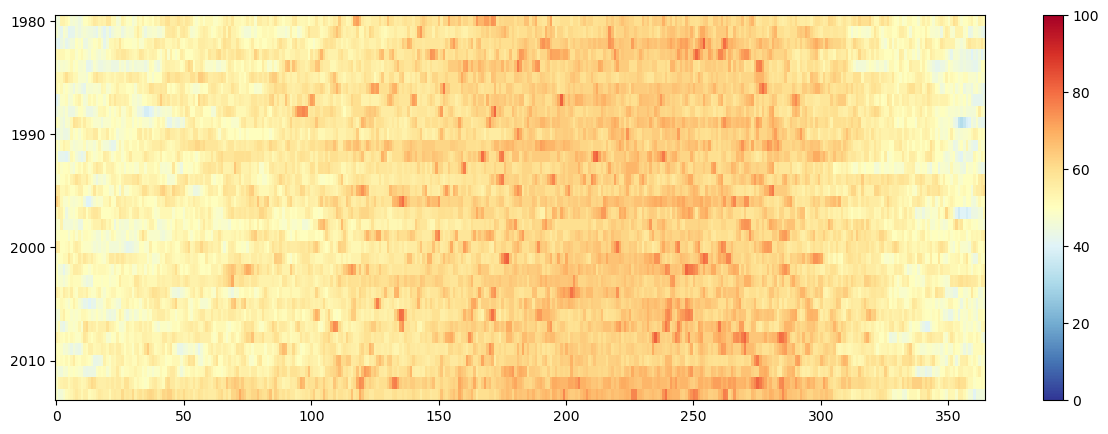

In [908]:
heat_array = np.array(list(new_dict.values()))
#heat_array = np.transpose(heat_array)
plt.figure(figsize=(15, 5))
plt.imshow(heat_array, cmap='RdYlBu_r', interpolation='nearest', aspect='auto',  vmin=0, vmax=100)
tick_positions = [0, 10, 20, 30]  # Tick positions should match the number of labels
tick_labels = [1980, 1990, 2000, 2010]
plt.yticks(tick_positions, tick_labels)
plt.colorbar()

In [909]:
group2_cleaned = {key: value for key, value in grouped_2.items() if key[0] > year}
group2_cleaned = {key: value for key, value in group2_cleaned.items() if key[1] == 'Summer'}
group2_cleaned

{(1981, 'Summer'): [74.0,
  73.0,
  60.0,
  62.0,
  61.0,
  62.0,
  62.0,
  62.0,
  62.0,
  60.0,
  62.0,
  61.0,
  61.0,
  66.0,
  66.0,
  60.0,
  64.0,
  68.0,
  60.0,
  59.0,
  58.0,
  58.0,
  64.0,
  71.0,
  57.0,
  58.0,
  58.0,
  60.0,
  60.0,
  60.0,
  60.0,
  57.0,
  60.0,
  60.0,
  58.0,
  62.0,
  64.0,
  61.0,
  62.0,
  62.0,
  59.0,
  59.0,
  60.0,
  60.0,
  60.0,
  64.0,
  62.0,
  64.0,
  61.0,
  62.0,
  64.0,
  66.0,
  64.0,
  63.0,
  62.0,
  62.0,
  60.0,
  60.0,
  60.0,
  65.0,
  62.0,
  64.0,
  60.0,
  63.0,
  64.0,
  63.0,
  63.0,
  69.0,
  64.0,
  61.0,
  64.0,
  60.0,
  64.0,
  61.0,
  62.0,
  60.0,
  66.0,
  62.0,
  60.0,
  60.0,
  59.0,
  60.0,
  61.0,
  63.0,
  64.0,
  60.0,
  60.0,
  64.0,
  64.0,
  62.0,
  66.0,
  61.0,
  64.0,
  62.0],
 (1982, 'Summer'): [62.0,
  62.0,
  63.0,
  64.0,
  66.0,
  68.0,
  64.0,
  60.0,
  62.0,
  60.0,
  58.0,
  60.0,
  60.0,
  60.0,
  62.0,
  62.0,
  60.0,
  64.0,
  62.0,
  62.0,
  60.0,
  68.0,
  64.0,
  66.0,
  64.0,
  57.0,
  6

In [910]:

x = [s for s in range(0,len(group2_cleaned))]
heat_mean = [np.mean(s) for s in group2_cleaned.values()]
heat_min = [np.min(s) for s in group2_cleaned.values()]
heat_max = [np.max(s) for s in group2_cleaned.values()]

(40.0, 90.0)

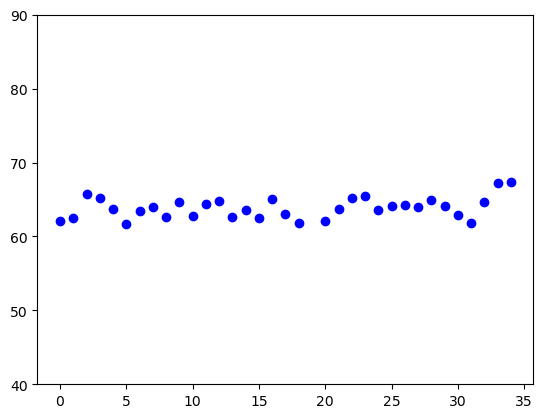

In [911]:

plt.scatter(x, y = heat_mean, label=" Plot", color='blue')
plt.ylim(40, 90)
#plt.fill_between(x,y1=heat_min, y2=heat_max, color='lightblue', alpha=0.5, label="Range")

(40.0, 90.0)

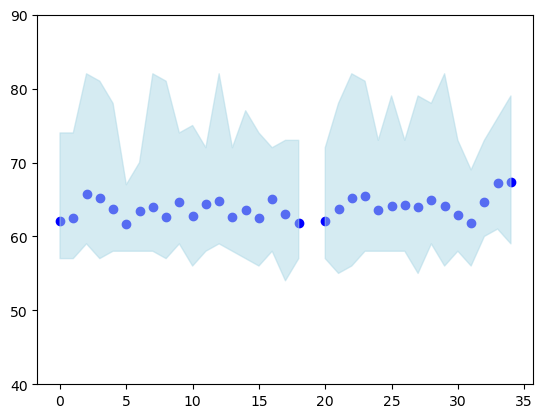

In [912]:

plt.scatter(x, y = heat_mean, label=" Plot", color='blue')
plt.fill_between(x,y1=heat_min, y2=heat_max, color='lightblue', alpha=0.5, label="Range")
plt.ylim(40, 90)

In [913]:
index = [np.full(len(heat_array[i]), i) for i in range (len(heat_array))]
flattend = heat_array.flatten()
x = [s for s in range(0,len(new_dict))]
heat_mean = [np.mean(s) for s in new_dict.values()]
heat_min = [np.min(s) for s in new_dict.values()]
heat_max = [np.max(s) for s in new_dict.values()]

(45.0, 60.0)

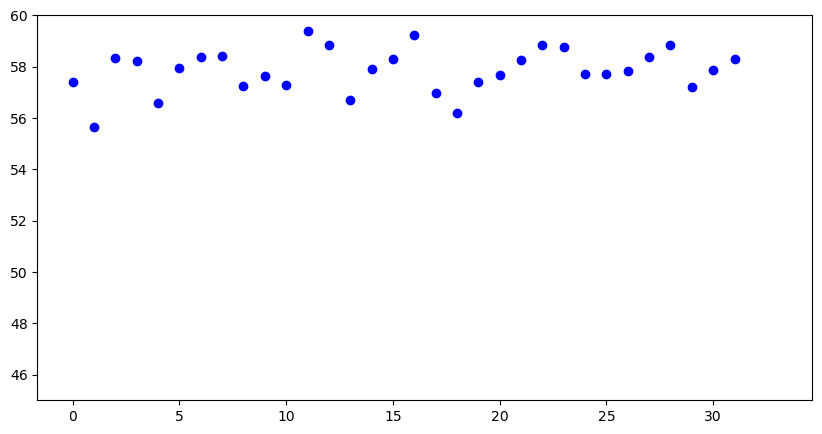

In [914]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y = heat_mean, label=" Plot", color='blue')
plt.ylim(45, 60)

(0.0, 100.0)

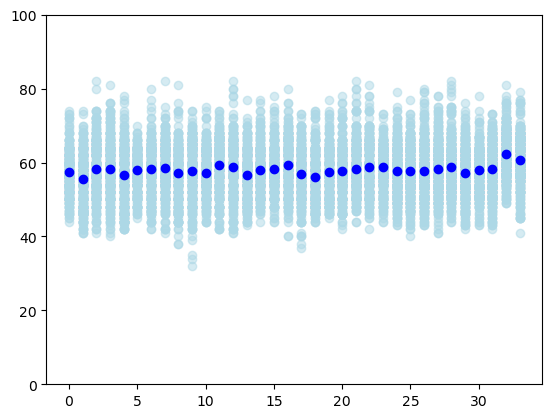

In [915]:
plt.scatter(index,y=flattend, color='lightblue', alpha=0.5, label="Range")
plt.scatter(x, y = heat_mean, label=" Plot", color='blue')

plt.ylim(0, 100)